# 1. Imprort data & packages

In [1]:
%run C:/Users/HSS/dd.py
print('done')

done


In [4]:
churn = pd.read_csv('C:/Users/HSS/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [47]:
pd.set_option('display.max_columns', None)
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Columns 
- `customerID`: Customer ID
- `gender`: Whether the customer is a male or a female
- `SeniorCitizen`: Whether the customer is a senior citizen or not (1, 0)
- `Partner`: Whether the customer has a partner or not (Yes, No)
- `Dependents`: Whether the customer has dependents or not (Yes, No)
- `tenure`: Number of months the customer has stayed with the company
- `PhoneService`: Whether the customer has a phone service or not (Yes, No)
- `MultipleLines`: Whether the customer has multiple lines or not (Yes, No, No phone service)
- `InternetService`: Customer’s internet service provider (DSL, Fiber optic, No)
- `OnlineSecurity`: Whether the customer has online security or not (Yes, No, No internet service)
- `OnlineBackup`: Whether the customer has online backup or not (Yes, No, No internet service)
- `DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service)
- `TechSupport`: Whether the customer has tech support or not (Yes, No, No internet service)
- `StreamingTV`: Whether the customer has streaming TV or not (Yes, No, No internet service)
- `StreamingMovie`: sWhether the customer has streaming movies or not (Yes, No, No internet service)
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year)
- `PaperlessBilling`: Whether the customer has paperless billing or not (Yes, No)
- `PaymentMethod`: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- `MonthlyChargesThe amount charged to the customer monthly
- `TotalCharges`: The total amount charged to the customer
- `ChurnWhether`: the customer churned or not (Yes or No)

### - Make 1, 0 values 
- Partener, Dependents 등 Yes or No로 되어 있는 데이터를 1과 0으로 변경

In [106]:
# Yes, NO ONE HOT 
data = churn.copy()
columns = data.columns.values
y_n_columns = columns[[3,4,6,9,10,11,12,13,14,16,20]]
y_n_columns

array(['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Churn'], dtype=object)

In [107]:
for i in y_n_columns:
    data[i] = data[i].apply(lambda x: 0 if x == 'No' else 1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [102]:
# tenure
print('평균 계약 기간은 {}개월이고, 75%의 사람들은 {}개월 이하 동안 해당 통신사를 사용했습니다. 최장수 고객은 무려 {}개월이나 계약을 유지했습니다. '
     .format(int(data['tenure'].mean()), int(data['tenure'].quantile(0.75)), data['tenure'].max()))

평균 계약 기간은 32개월이고, 75%의 사람들은 55개월 이하 동안 해당 통신사를 사용했습니다. 최장수 고객은 무려 72개월이나 계약을 유지했습니다. 


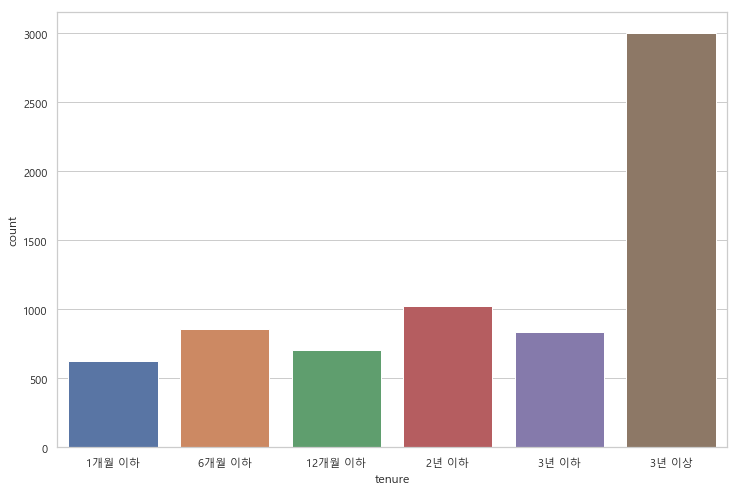

In [114]:
plt.figure(figsize=(12,8))
sns.countplot(data['tenure'])

In [100]:
data['tenure'].quantile([0.25,0.5,0.75])

0.25     9.0
0.50    29.0
0.75    55.0
Name: tenure, dtype: float64

In [112]:
data['tenure'] = pd.cut(data['tenure'], [-1, 1, 6, 12, 24, 36, 72], labels=['1개월 이하','6개월 이하', '12개월 이하', '2년 이하', '3년 이하', '3년 이상'])

TypeError: unorderable types: int() < str()